In [2]:
!pip install seaborn
import numpy as np
import seaborn as sns
import pandas as pd
np.random.seed(seed=42)


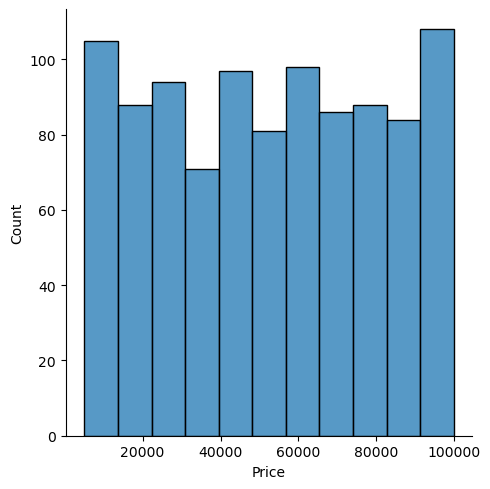

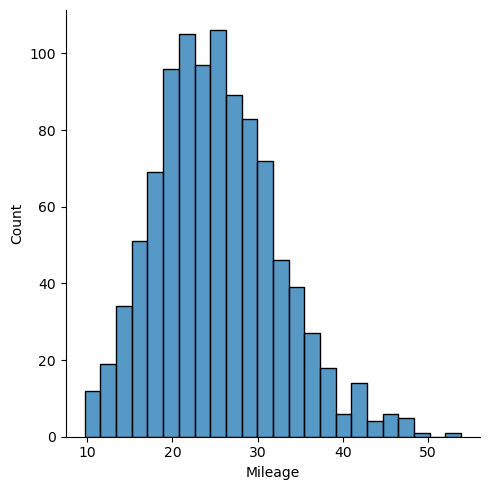

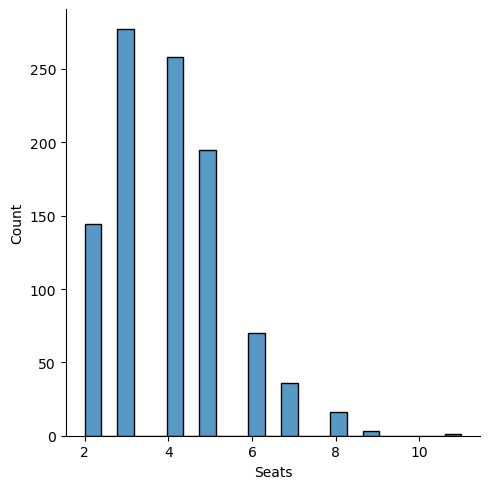

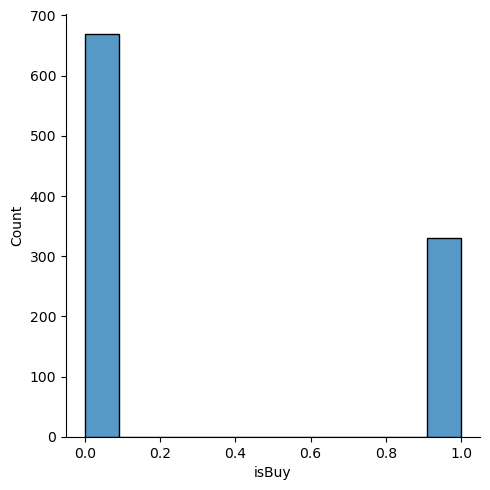

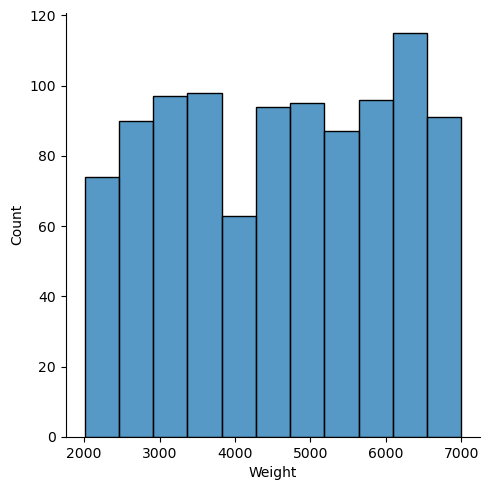

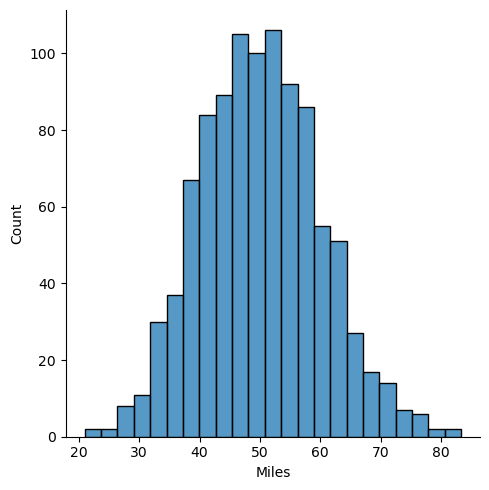

In [3]:
count = 1000
prices = np.random.randint(low=5000,high=100000,size=(count),dtype='int')
mileage = np.random.chisquare(df=25, size=(count))
cars = pd.DataFrame(data=prices, index=range(count), columns=['Price'])
cars['Mileage'] = mileage
cars['Seats'] = np.random.poisson(lam=2, size=count)+2
cars['isBuy'] = np.random.binomial(n=1,p=0.33, size=count)
cars['Weight'] = np.random.randint(low=2000,high=7000,size=(count),dtype='int')
cars['Miles'] = np.random.chisquare(df=50, size=(count))
sns.displot(data=cars, x="Price")
sns.displot(data=cars, x="Mileage")
sns.displot(data=cars, x="Seats")
sns.displot(data=cars, x="isBuy")
sns.displot(data=cars, x="Weight")
sns.displot(data=cars, x="Miles")


In [5]:
print(cars[['Mileage','Weight', 'Seats', 'Miles']])

       Mileage  Weight  Seats      Miles
0    14.071502    5738      2  47.557133
1    47.533059    4731      3  64.331049
2    29.081275    6007      2  47.685204
3    19.080372    2869      4  35.336021
4    22.874290    2093      2  38.880152
..         ...     ...    ...        ...
995  11.810236    5367      4  60.478105
996  22.340770    5951      4  63.299670
997  25.553175    4497      3  44.417577
998  17.666262    3573      6  54.768503
999  16.853770    4634      3  59.567824

[1000 rows x 4 columns]


In [6]:
from sklearn.model_selection import train_test_split
!pip install xgboost

# Splitting 
train_X, test_X, train_y, test_y = train_test_split(cars[['Mileage','Weight', 'Seats', 'Miles']], cars['Price'], 
                      test_size = 0.3, random_state = 123) 


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.8 MB/s eta 0:00:00:00:0100:01


In [14]:
import xgboost as xg 
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.model_selection import GridSearchCV

# Instantiation 
xgb_r = xg.XGBRegressor(seed = 50) 

parameters = {'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'n_estimators': [50, 100, 500, 1000]}

xgb_grid = GridSearchCV(xgb_r,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)
  
# Fitting the model 
xgb_grid.fit(train_X, train_y) 

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
  
# Predict the model 
pred = xgb_grid.predict(test_X) 
  
# RMSE Computation 
rmse = np.sqrt(MSE(test_y, pred)) 
print("RMSE : % f" %(rmse)) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
-0.0741450209026766
{'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 50, 'objective': 'reg:squarederror'}
RMSE :  28091.705801
